In [2]:
import pandas as pd
import numpy as np

data_xtest = pd.read_csv('X_test.txt', header = None)
data_xtrain = pd.read_csv('X_train.txt')
data_ytrain = pd.read_csv('Y_train.txt')

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_xtrain,data_xtest,test_size = 0.2, random_state = 0)

In [3]:
y_test

,0,1,2,3,4,5,6,7,8,9,...,97,98,99,100,101,102,103,104,105,106
7069,1379.0,7.0,176.0,124.0,155.0,2.0,0.0,233.44,0.0,127860.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
733,1162.0,7.0,412.0,168.0,210.0,0.0,144.0,193.28,0.0,255654.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5278,2590.0,28.0,2388.0,520.0,650.0,12.0,176.0,200.00,0.0,246006.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3241,1113.0,14.0,3208.0,152.0,190.0,0.0,32.0,220.08,0.0,6909120.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2909,896.0,0.0,0.0,396.0,495.0,2.0,144.0,258.40,5.0,5958768.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5619,3024.0,7.0,164.0,308.0,385.0,6.0,24.0,153.20,0.0,2402424.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6546,42.0,0.0,0.0,100.0,125.0,4.0,0.0,326.80,5.0,3264798.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
745,826.0,14.0,8.0,160.0,200.0,2.0,8.0,359.44,0.0,126576.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2505,161.0,0.0,0.0,36.0,45.0,0.0,32.0,43.52,5.0,240564.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 20, random_state = 0)
regressor.fit(data_xtrain,data_ytrain)
y_pred = regressor.predict(data_xtest)

C:\conda\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(data_xtrain)
X_test = sc.transform(data_xtest)

In [6]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 107, random_state = 0)
regressor.fit(X_train,data_ytrain)
y_prediction = regressor.predict(X_test)

C:\conda\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(X_test,X_train))
print('Mean Squared Error:',metrics.mean_squared_error(X_test,X_train))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(X_test,X_train)))

Mean Absolute Error: 0.7050879367609287
Mean Squared Error: 2.3259628530762266
Root Mean Squared Error: 1.525110767477637


In [11]:
regressor.fit(X_train,data_ytrain)
predictions = regressor.predict(X_test)
submission = pd.DataFrame({'Prediction':predictions})
submission.index.name= 'id'
submission.reset_index(level=0, inplace=True)
submission.to_latex(index=False)
submission.to_csv('Y_random.csv',index=False)

C:\conda\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [13]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [15]:
from sklearn.metrics import confusion_matrix

In [18]:
data_ytrain

,0.00
0,1.0
1,1.0
2,1.0
3,0.0
4,1.0
...,...
7417,1.0
7418,0.0
7419,1.0
7420,0.0


In [19]:
from sklearn.metrics import roc_auc_score
roc_auc_score(data_ytrain, predictions)

0.5010389311601715

In [ ]:
roc_auc_score(data_ytrain, predictions)

In [1]:
data_ytrain

NameError: name 'data_ytrain' is not defined

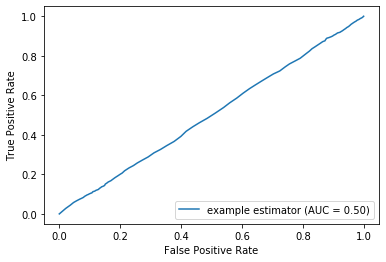

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(data_ytrain, predictions)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')
display.plot()  # doctest: +SKIP
plt.show()      # doctest: +SKIP